<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/collab_learner_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai import *
from fastai.collab import *

In [2]:
!wget http://files.grouplens.org/datasets/movielens/ml-100k.zip

--2020-09-28 10:02:30--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  5.64MB/s    in 0.8s    

2020-09-28 10:02:31 (5.64 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]



In [3]:
!ls

ml-100k.zip  sample_data


In [4]:
# unzip 'ml-100k.zip'
!mkdir data

In [5]:
!unzip ml-100k.zip -d data

Archive:  ml-100k.zip
   creating: data/ml-100k/
  inflating: data/ml-100k/allbut.pl  
  inflating: data/ml-100k/mku.sh     
  inflating: data/ml-100k/README     
  inflating: data/ml-100k/u.data     
  inflating: data/ml-100k/u.genre    
  inflating: data/ml-100k/u.info     
  inflating: data/ml-100k/u.item     
  inflating: data/ml-100k/u.occupation  
  inflating: data/ml-100k/u.user     
  inflating: data/ml-100k/u1.base    
  inflating: data/ml-100k/u1.test    
  inflating: data/ml-100k/u2.base    
  inflating: data/ml-100k/u2.test    
  inflating: data/ml-100k/u3.base    
  inflating: data/ml-100k/u3.test    
  inflating: data/ml-100k/u4.base    
  inflating: data/ml-100k/u4.test    
  inflating: data/ml-100k/u5.base    
  inflating: data/ml-100k/u5.test    
  inflating: data/ml-100k/ua.base    
  inflating: data/ml-100k/ua.test    
  inflating: data/ml-100k/ub.base    
  inflating: data/ml-100k/ub.test    


In [6]:
!pwd

/content


In [7]:
!cd data

In [8]:
path = Path('/content')
path.ls()

[PosixPath('/content/.config'),
 PosixPath('/content/data'),
 PosixPath('/content/ml-100k.zip'),
 PosixPath('/content/sample_data')]

In [9]:
path = path/'data'
path.ls()

[PosixPath('/content/data/ml-100k')]

In [10]:
path = path/'ml-100k'
path.ls()

[PosixPath('/content/data/ml-100k/allbut.pl'),
 PosixPath('/content/data/ml-100k/u2.test'),
 PosixPath('/content/data/ml-100k/u2.base'),
 PosixPath('/content/data/ml-100k/u.info'),
 PosixPath('/content/data/ml-100k/u1.test'),
 PosixPath('/content/data/ml-100k/README'),
 PosixPath('/content/data/ml-100k/ua.test'),
 PosixPath('/content/data/ml-100k/u.data'),
 PosixPath('/content/data/ml-100k/u4.base'),
 PosixPath('/content/data/ml-100k/u5.base'),
 PosixPath('/content/data/ml-100k/u5.test'),
 PosixPath('/content/data/ml-100k/u.user'),
 PosixPath('/content/data/ml-100k/u1.base'),
 PosixPath('/content/data/ml-100k/u.genre'),
 PosixPath('/content/data/ml-100k/u.item'),
 PosixPath('/content/data/ml-100k/ub.base'),
 PosixPath('/content/data/ml-100k/u4.test'),
 PosixPath('/content/data/ml-100k/u3.base'),
 PosixPath('/content/data/ml-100k/ub.test'),
 PosixPath('/content/data/ml-100k/u.occupation'),
 PosixPath('/content/data/ml-100k/ua.base'),
 PosixPath('/content/data/ml-100k/mku.sh'),
 PosixPat

In [11]:
cat /content/data/ml-100k/README

SUMMARY & USAGE LICENSE

MovieLens data sets were collected by the GroupLens Research Project
at the University of Minnesota.
 
This data set consists of:
	* 100,000 ratings (1-5) from 943 users on 1682 movies. 
	* Each user has rated at least 20 movies. 
        * Simple demographic info for the users (age, gender, occupation, zip)

The data was collected through the MovieLens web site
(movielens.umn.edu) during the seven-month period from September 19th, 
1997 through April 22nd, 1998. This data has been cleaned up - users
who had less than 20 ratings or did not have complete demographic
information were removed from this data set. Detailed descriptions of
the data file can be found at the end of this file.

Neither the University of Minnesota nor any of the researchers
involved can guarantee the correctness of the data, its suitability
for any particular purpose, or the validity of results based on the
use of the data set.  The data set may be used for any research
purposes under th

In [12]:
movies = pd.read_csv(path/'u.item', encoding='latin-1', delimiter='|', header = None, names = ["movie_id", "movie_title", "release date", "video release date", "IMDb URL", "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"])
movies.head()

,movie_id,movie_title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [13]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header= None, names=['user_id', 'movie_id', 'rating', 'timestamp'])
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [15]:
movies[['movie_id', 'movie_title']].head()

,movie_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [16]:
data_df = ratings.merge(movies[['movie_id', 'movie_title']], how = 'inner', on = 'movie_id')
data_df.head()

,user_id,movie_id,rating,timestamp,movie_title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [17]:
data = CollabDataBunch.from_df(data_df, item_name = 'movie_title')
data.show_batch()

user_id,movie_title,target
506,Ransom (1996),5.0
536,Jaws (1975),4.0
871,Vermin (1998),3.0
94,Rising Sun (1993),2.0
788,Some Like It Hot (1959),4.0


In [18]:
doc(collab_learner)

In [19]:
learn = collab_learner(data, n_factors=50, y_range = [0, 5.5])
learn.summary()

EmbeddingDotBias
Layer (type)         Output Shape         Param #    Trainable 
Embedding            [50]                 47,200     True      
______________________________________________________________________
Embedding            [50]                 81,900     True      
______________________________________________________________________
Embedding            [1]                  944        True      
______________________________________________________________________
Embedding            [1]                  1,638      True      
______________________________________________________________________

Total params: 131,682
Total trainable params: 131,682
Total non-trainable params: 0
Optimized with 'torch.optim.adam.Adam', betas=(0.9, 0.99)
Using true weight decay as discussed in https://www.fast.ai/2018/07/02/adam-weight-decay/ 
Loss function : FlattenedLoss
Callbacks functions applied 

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


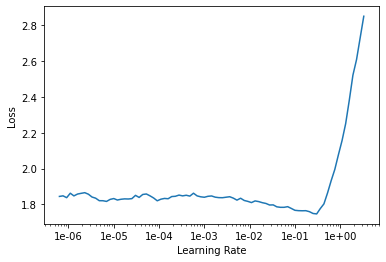

In [20]:
learn.lr_find()
learn.recorder.plot()

In [21]:
learn = collab_learner(data, n_factors=50, y_range = [0, 5.5], wd = 1e-01)
learn.fit(4, lr = slice(5e-03))

epoch,train_loss,valid_loss,time
0,0.861131,0.881301,00:06
1,0.758432,0.867211,00:06
2,0.634145,0.863794,00:06
3,0.583325,0.877207,00:06


In [22]:
#test
data_df.head()

,user_id,movie_id,rating,timestamp,movie_title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [23]:
top_movies = data_df.groupby('movie_title')['rating'].sum().sort_values(ascending = False).index.values[:1000]

In [24]:
top_movies

array(['Star Wars (1977)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Contact (1997)', ...,
       'Specialist, The (1994)', 'Air Up There, The (1994)', 'Beverly Hillbillies, The (1993)',
       'Red Firecracker, Green Firecracker (1994)'], dtype=object)

In [25]:
top_bias = learn.bias(top_movies, is_item = True)

In [26]:
mean_ratings = data_df.groupby('movie_title')['rating'].mean()
mean_ratings.loc['101 Dalmatians (1996)']

2.908256880733945

In [27]:
movie_mean_ratings = [(i, b, mean_ratings.loc[i]) for i, b in zip(top_movies, top_bias)]
movie_mean_ratings[:10]

[('Star Wars (1977)', tensor(0.6287), 4.3584905660377355),
 ('Fargo (1996)', tensor(0.4106), 4.155511811023622),
 ('Return of the Jedi (1983)', tensor(0.5458), 4.007889546351085),
 ('Contact (1997)', tensor(0.3450), 3.8035363457760316),
 ('Raiders of the Lost Ark (1981)', tensor(0.4921), 4.252380952380952),
 ('Godfather, The (1972)', tensor(0.5365), 4.283292978208232),
 ('English Patient, The (1996)', tensor(0.1571), 3.656964656964657),
 ('Toy Story (1995)', tensor(0.3658), 3.8783185840707963),
 ('Silence of the Lambs, The (1991)', tensor(0.6293), 4.28974358974359),
 ('Scream (1996)', tensor(0.2115), 3.4414225941422596)]

In [28]:
movie_mean_ratings[-10:]

[('Mark of Zorro, The (1940)', tensor(0.2344), 3.6153846153846154),
 ('Party Girl (1995)', tensor(0.0370), 2.875),
 ('Farewell to Arms, A (1932)', tensor(0.1569), 3.8333333333333335),
 ('Bastard Out of Carolina (1996)', tensor(0.0430), 2.875),
 ('Little Big League (1994)', tensor(-0.0478), 2.875),
 ('Four Days in September (1997)', tensor(0.2092), 3.75),
 ('Specialist, The (1994)', tensor(-0.0325), 2.25),
 ('Air Up There, The (1994)', tensor(-0.0589), 2.8125),
 ('Beverly Hillbillies, The (1993)', tensor(-0.2220), 2.25),
 ('Red Firecracker, Green Firecracker (1994)',
  tensor(0.0922),
  3.4615384615384617)]

In [29]:
sorted(movie_mean_ratings, key = lambda x: x[1], reverse = False)[:10]

[("McHale's Navy (1997)", tensor(-0.3673), 2.1884057971014492),
 ('Speed 2: Cruise Control (1997)', tensor(-0.3644), 2.1315789473684212),
 ('Island of Dr. Moreau, The (1996)', tensor(-0.3462), 2.1578947368421053),
 ('Crow: City of Angels, The (1996)', tensor(-0.3368), 1.9487179487179487),
 ('Mortal Kombat: Annihilation (1997)', tensor(-0.3339), 1.9534883720930232),
 ('Flintstones, The (1994)', tensor(-0.3248), 2.064516129032258),
 ('Booty Call (1997)', tensor(-0.2977), 2.1666666666666665),
 ('Tales from the Hood (1995)', tensor(-0.2872), 2.037037037037037),
 ('Leave It to Beaver (1997)', tensor(-0.2834), 1.8409090909090908),
 ('Cable Guy, The (1996)', tensor(-0.2780), 2.339622641509434)]

In [30]:
sorted(movie_mean_ratings, key = lambda x: x[1], reverse = True)[:10]

[('Shawshank Redemption, The (1994)', tensor(0.7150), 4.445229681978798),
 ("Schindler's List (1993)", tensor(0.6910), 4.466442953020135),
 ('Usual Suspects, The (1995)', tensor(0.6783), 4.385767790262173),
 ('L.A. Confidential (1997)', tensor(0.6703), 4.161616161616162),
 ('Silence of the Lambs, The (1991)', tensor(0.6293), 4.28974358974359),
 ('Star Wars (1977)', tensor(0.6287), 4.3584905660377355),
 ('Good Will Hunting (1997)', tensor(0.6260), 4.262626262626263),
 ('North by Northwest (1959)', tensor(0.6065), 4.284916201117318),
 ('Titanic (1997)', tensor(0.6029), 4.2457142857142856),
 ('As Good As It Gets (1997)', tensor(0.5902), 4.196428571428571)]

In [31]:
top_weights = learn.weight(top_movies, is_item = True)
top_weights.shape

torch.Size([1000, 50])

In [33]:
#test
top_weights[0]

tensor([ 0.1314, -0.1135, -0.0831, -0.1472, -0.5753, -0.0256,  0.0961,  0.3925,
         0.4453,  0.2447, -0.1449, -0.3880,  0.3135, -0.0703, -0.0486, -0.2407,
        -0.0233, -0.0667,  0.3660,  0.1783,  0.4417,  0.3979, -0.1405,  0.2695,
         0.3092,  0.2954, -0.5112, -0.2343,  0.0987,  0.1712,  0.2809, -0.0510,
         0.5407, -0.2343,  0.1491, -0.3556, -0.2109, -0.3748, -0.1008, -0.1031,
        -0.1017,  0.3970, -0.1683, -0.4055, -0.0582, -0.4115, -0.0118,  0.5473,
        -0.2255,  0.1652])

In [35]:
movie_wpca = top_weights.pca(3)
movie_wpca.shape, movie_wpca[0]

(torch.Size([1000, 3]), tensor([-0.6439, -0.7972,  0.4499]))

In [58]:
w1, w2, w3 = movie_wpca.t()
# w1, w2, w3 = [[w[0], i for w, i in zip(wpca, top_movies)], [w[1], i for w, i in zip(wpca, top_movies)], [w[2], i for w, i in zip(wpca, top_movies)]]
w1_ana = [(w, i) for w, i in zip(w1, top_movies)]
w2_ana = [(w, i) for w, i in zip(w2, top_movies)]
w3_ana = [(w, i) for w, i in zip(w3, top_movies)]

In [61]:

sorted(w1_ana, key = lambda x: x[0])[:10], sorted(w1_ana, key = lambda x: x[0], reverse = True)[:10]

([(tensor(-1.1158), 'Chinatown (1974)'),
  (tensor(-1.0986), 'Ran (1985)'),
  (tensor(-1.0383), 'Lawrence of Arabia (1962)'),
  (tensor(-1.0284), 'Secrets & Lies (1996)'),
  (tensor(-0.9987), 'Fargo (1996)'),
  (tensor(-0.9877), 'Big Night (1996)'),
  (tensor(-0.9780), 'Shall We Dance? (1996)'),
  (tensor(-0.9710), 'Taxi Driver (1976)'),
  (tensor(-0.9411), 'Casablanca (1942)'),
  (tensor(-0.9191), 'Thin Man, The (1934)')],
 [(tensor(1.2285), 'Jungle2Jungle (1997)'),
  (tensor(1.0794), 'Leave It to Beaver (1997)'),
  (tensor(1.0562), "McHale's Navy (1997)"),
  (tensor(1.0340), 'D3: The Mighty Ducks (1996)'),
  (tensor(1.0155), 'Batman & Robin (1997)'),
  (tensor(1.0142), 'Sliver (1993)'),
  (tensor(0.9507), 'Booty Call (1997)'),
  (tensor(0.9322), 'Congo (1995)'),
  (tensor(0.9295), 'Batman Forever (1995)'),
  (tensor(0.9287), 'Flintstones, The (1994)')])

In [62]:
sorted(w2_ana, key = lambda x: x[0])[:10], sorted(w2_ana, key = lambda x: x[0], reverse = True)[:10]

([(tensor(-1.1762), 'Braveheart (1995)'),
  (tensor(-1.1072), 'Raiders of the Lost Ark (1981)'),
  (tensor(-0.9893), 'Forrest Gump (1994)'),
  (tensor(-0.9342), 'Back to the Future (1985)'),
  (tensor(-0.8859), 'Fugitive, The (1993)'),
  (tensor(-0.8719), 'Independence Day (ID4) (1996)'),
  (tensor(-0.8692), "It's a Wonderful Life (1946)"),
  (tensor(-0.8674), 'Indiana Jones and the Last Crusade (1989)'),
  (tensor(-0.8646), "Mr. Holland's Opus (1995)"),
  (tensor(-0.8259), 'Hunt for Red October, The (1990)')],
 [(tensor(0.8273), 'Crow: City of Angels, The (1996)'),
  (tensor(0.8079), 'Booty Call (1997)'),
  (tensor(0.7811), 'To Die For (1995)'),
  (tensor(0.7680), 'Very Brady Sequel, A (1996)'),
  (tensor(0.7418), 'Exotica (1994)'),
  (tensor(0.7308), 'Angels and Insects (1995)'),
  (tensor(0.7177), 'Excess Baggage (1997)'),
  (tensor(0.7177), 'Serial Mom (1994)'),
  (tensor(0.7045), 'Keys to Tulsa (1997)'),
  (tensor(0.6922), 'Heavenly Creatures (1994)')])

In [63]:
sorted(w3_ana, key = lambda x: x[0])[:10], sorted(w3_ana, key = lambda x: x[0], reverse = True)[:10]

([(tensor(-0.6961), 'Gone with the Wind (1939)'),
  (tensor(-0.6870), 'Cinema Paradiso (1988)'),
  (tensor(-0.6540), 'Bridges of Madison County, The (1995)'),
  (tensor(-0.6401), 'English Patient, The (1996)'),
  (tensor(-0.6145), 'Priest (1994)'),
  (tensor(-0.5855), 'Everyone Says I Love You (1996)'),
  (tensor(-0.5821), 'FairyTale: A True Story (1997)'),
  (tensor(-0.5618), 'Postino, Il (1994)'),
  (tensor(-0.5507), 'Kolya (1996)'),
  (tensor(-0.5449), 'Evita (1996)')],
 [(tensor(0.9918), 'Beavis and Butt-head Do America (1996)'),
  (tensor(0.9161), 'Reservoir Dogs (1992)'),
  (tensor(0.8615), 'Terminator, The (1984)'),
  (tensor(0.8605), 'Pulp Fiction (1994)'),
  (tensor(0.8579), 'Die Hard (1988)'),
  (tensor(0.8143), 'Alien (1979)'),
  (tensor(0.8024), 'Alien: Resurrection (1997)'),
  (tensor(0.7989), 'Nightmare on Elm Street, A (1984)'),
  (tensor(0.7574), 'Event Horizon (1997)'),
  (tensor(0.7366), 'Seven (Se7en) (1995)')])